In [2]:
%load_ext rpy2.ipython

In [3]:
%%R
setwd("/content/drive/MyDrive/tripdatcyc")
list.files()

 [1] "2013"            "2014"            "2015"            "2016"           
 [5] "2017"            "2018"            "2019"            "2020"           
 [9] "2021"            "trip13to19.csv"  "trip20to21.csv"  "triptotal13.csv"
[13] "triptotal14.csv" "triptotal15.csv" "triptotal16.csv" "triptotal17.csv"
[17] "triptotal18.csv" "triptotal19.csv" "triptotal20.csv" "triptotal21.csv"


In [4]:
%%R
library(tidyverse)
library(lubridate)

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

R[write to console]: 
Attaching package: ‘lubridate’


R[write to console]: The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [5]:
%%R
t1 = read_csv("trip13to19.csv")

Rows: 21243283 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): from_station_name, to_station_name, usertype
dbl  (4): tripduration, trip_id, from_station_id, to_station_id
lgl  (1): rideable_type
dttm (2): starttime, stoptime

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [6]:
%%R
print(head(t1))

# A tibble: 6 × 10
  tripduration trip_id rideable_type starttime           stoptime           
         <dbl>   <dbl> <lgl>         <dttm>              <dttm>             
1          316    4118 NA            2013-06-27 12:11:00 2013-06-27 12:16:00
2           64    4275 NA            2013-06-27 14:44:00 2013-06-27 14:45:00
3          433    4291 NA            2013-06-27 14:58:00 2013-06-27 15:05:00
4          123    4316 NA            2013-06-27 15:06:00 2013-06-27 15:09:00
5          852    4342 NA            2013-06-27 15:13:00 2013-06-27 15:27:00
6        10105    4480 NA            2013-06-27 19:40:00 2013-06-27 22:28:00
# … with 5 more variables: from_station_name <chr>, from_station_id <dbl>,
#   to_station_name <chr>, to_station_id <dbl>, usertype <chr>


R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



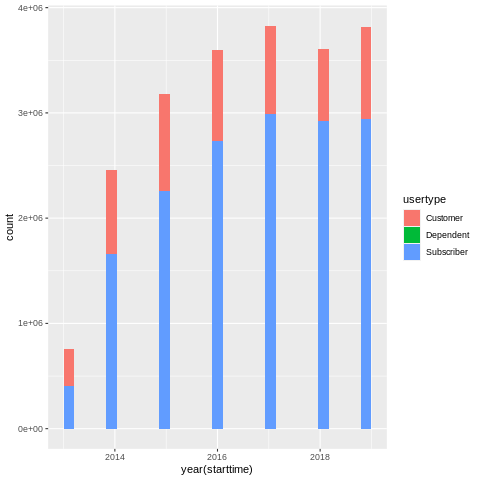

In [ ]:
%%R
ggplot(data=t1)+geom_histogram(mapping=aes(x=year(starttime),fill=usertype))

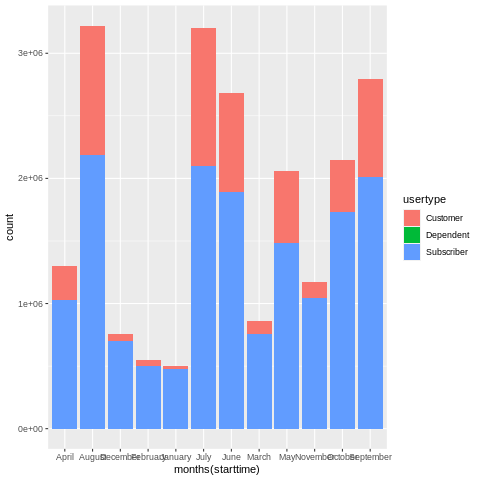

In [6]:
%%R
ggplot(data=t1)+geom_histogram(stat="count",mapping=aes(x=months(starttime),fill=usertype))

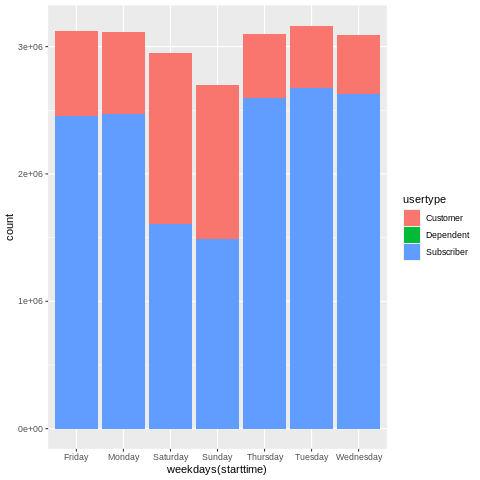

In [7]:
%%R
ggplot(data=t1)+geom_histogram(stat="count",mapping=aes(x=weekdays(starttime),fill=usertype))

In [8]:
%%R
print(summary(t1))

  tripduration         trip_id         rideable_type  
 Min.   :      60   Min.   :    3940   Mode:logical   
 1st Qu.:     411   1st Qu.: 7186556   NA's:21243283  
 Median :     707   Median :13754998                  
 Mean   :    1157   Mean   :13532829                  
 3rd Qu.:    1210   3rd Qu.:20007118                  
 Max.   :14336400   Max.   :25962904                  
   starttime                      stoptime                   from_station_name 
 Min.   :2013-06-27 01:06:00   Min.   :2013-06-27 09:46:00   Length:21243283   
 1st Qu.:2015-08-30 09:14:00   1st Qu.:2015-08-30 09:31:00   Class :character  
 Median :2017-04-22 18:16:33   Median :2017-04-22 18:36:26   Mode  :character  
 Mean   :2017-02-15 05:57:49   Mean   :2017-02-15 06:17:06                     
 3rd Qu.:2018-08-07 18:42:20   3rd Qu.:2018-08-07 19:00:30                     
 Max.   :2019-12-31 23:57:17   Max.   :2020-01-21 13:54:35                     
 from_station_id to_station_name    to_station_id     u

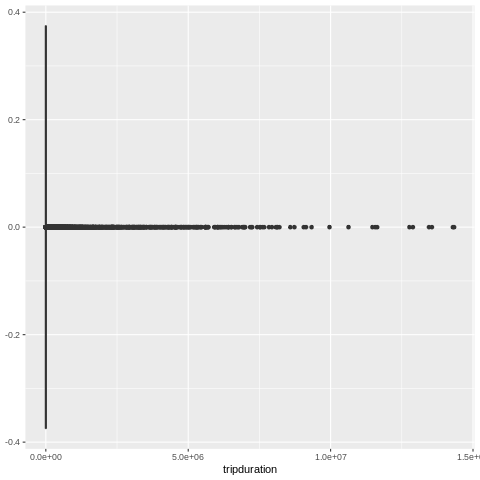

In [28]:
%%R
ggplot(data=t1, mapping=aes(x=tripduration))+geom_boxplot()

In [11]:
%%R
print(summary(as.factor(t1$from_station_name)))
print("-------------------------------------------------------------")
print(summary(as.factor(t1$to_station_name)))

            Streeter Dr & Grand Ave           Lake Shore Dr & Monroe St 
                             322538                              296233 
       Clinton St & Washington Blvd                 Canal St & Adams St 
                             285137                              274769 
                Theater on the Lake             Clinton St & Madison St 
                             248947                              242390 
         Lake Shore Dr & North Blvd               Michigan Ave & Oak St 
                             231532                              228811 
                    Millennium Park               Canal St & Madison St 
                             224919                              204395 
          Columbus Dr & Randolph St        Michigan Ave & Washington St 
                             198547                              192273 
                 Daley Center Plaza            Kingsbury St & Kinzie St 
                             168157                

In [13]:
%%R
summary(as.factor(t1$to_station_name))[3]

Lake Shore Dr & Monroe St 
                   273696 


In [14]:
%%R
t1$path = paste(t1$from_station_name,t1$to_station_name,sep="-->")

In [17]:
%%R
summary(as.factor(t1$path))

            Lake Shore Dr & Monroe St-->Streeter Dr & Grand Ave 
                                                          40921 
          Lake Shore Dr & Monroe St-->Lake Shore Dr & Monroe St 
                                                          38907 
              Streeter Dr & Grand Ave-->Streeter Dr & Grand Ave 
                                                          36083 
                  Michigan Ave & Oak St-->Michigan Ave & Oak St 
                                                          27671 
                  Streeter Dr & Grand Ave-->Theater on the Lake 
                                                          22270 
           Streeter Dr & Grand Ave-->Lake Shore Dr & North Blvd 
                                                          20937 
            Streeter Dr & Grand Ave-->Lake Shore Dr & Monroe St 
                                                          20101 
                  Theater on the Lake-->Streeter Dr & Grand Ave 
                         

In [21]:
%%R
print(length(unique(t1$to_station_name)))
print(length(unique(t1$from_station_name)))

[1] 749
[1] 749
